# Subsetting and Descriptive Stats

## Before your start:
   - Remember that you just need to do one of the challenges.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in IronHack's database.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly: enjoy the process!
   
#### Import all the necessary libraries here:

In [148]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# Challenge 1
#### In this challenge we will use the `Temp_States`  dataset. 

#### First import it into a dataframe called `temp`.

In [3]:
temp = pd.read_csv('Temp_States.csv')

#### Print `temp`.

In [6]:
temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the *temp* dataframe. What types of data do we have? Comment your result.

In [7]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         7 non-null      object 
 1   State        7 non-null      object 
 2   Temperature  7 non-null      float64
dtypes: float64(1), object(2)
memory usage: 296.0+ bytes


In [ ]:
"""
We have categorical data (City and States) and one column that is a float and that gives the temperature.
"""

#### Select the rows where state is New York.

In [10]:
new_york = temp.loc[(temp['State'] == 'New York')]
new_york

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average temperature of cities in New York?

In [11]:
new_york['Temperature'].mean()

10.74074074074074

#### Which states and cities have a temperature above 15 degrees Celsius?

In [14]:
states_and_cities = temp.loc[(temp['Temperature'] > 15)]
states_and_cities

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degrees Celsius.

In [16]:
cities = states_and_cities['City']
cities

0         NYC
3    Hartford
5      Treton
6      Newark
Name: City, dtype: object

#### Which cities have a temperature above 15 degrees Celcius and below 20 degrees Celsius?

**Hint**: First, write the condition. Then, select the rows.

In [18]:
temp.loc[(temp['Temperature'] > 15) & (temp['Temperature'] < 20)]

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222


#### Find the mean and standard deviation of the temperature of each state.

In [20]:
mean = temp.groupby(by=["State"])[["Temperature"]].mean()
mean

,Temperature
State,
Connecticut,15.833333
New Jersey,21.111111
New York,10.740741


In [21]:
std = temp.groupby(by=["State"])[["Temperature"]].std()
std

,Temperature
State,
Connecticut,1.964186
New Jersey,1.571348
New York,8.133404


#  Challenge 2

#### Load the `employees` dataset into a dataframe. Call the dataframe `employees`.

In [23]:
employees = pd.read_csv('Employees.csv')
employees

,Department,Education,Title,Name,Years,Salary
0,Admin,Master,associate,David,4,58
1,IT,Master,associate,Thomas,7,45
2,Admin,Master,associate,Diana,10,52
3,Admin,Master,VP,Manuella,15,33
4,Sales,Master,Analyst,Carla,6,38
...,...,...,...,...,...,...
495,Sales,PhD,VP,Calvin,2,119
496,HR,Master,Analyst,Dustin,6,67
497,Sales,PhD,VP,Winston,13,93
498,IT,PhD,Analyst,Earl,12,108


#### Explore the data types of the `employees` dataframe. Comment your results.

In [24]:
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Department  500 non-null    object
 1   Education   500 non-null    object
 2   Title       500 non-null    object
 3   Name        500 non-null    object
 4   Years       500 non-null    int64 
 5   Salary      500 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 23.6+ KB


In [ ]:
"""
The employees dataframe include 2 columns that are integers: Years and Salary.
It also includes the Name, which is nominal data.
Finally, it includes categorical data such as the Department, Education and Title.
"""

#### What's the average salary in this company?

In [25]:
employees["Salary"].mean()

73.528

#### What's the highest salary?

In [26]:
employees["Salary"].max()

120

#### What's the lowest salary?

In [27]:
employees["Salary"].min()

30

#### Who are the employees with the lowest salary?

In [28]:
employees.loc[(employees['Salary'] == 30)]

,Department,Education,Title,Name,Years,Salary
27,IT,Bachelor,Analyst,Sean,12,30
106,Admin,Bachelor,associate,Luke,4,30
128,Sales,PhD,VP,Adam,8,30
139,Sales,PhD,Analyst,Rick,11,30
214,Sales,Master,VP,Neil,11,30
266,HR,PhD,associate,Marcel,10,30
452,IT,Bachelor,Analyst,Augustin,13,30


#### Find all the information about an employee called David.

In [29]:
employees.loc[(employees['Name'] == 'David')]

,Department,Education,Title,Name,Years,Salary
0,Admin,Master,associate,David,4,58
124,IT,Bachelor,VP,David,3,31


#### Could you return only David's salary?

In [31]:
employees.loc[(employees['Name'] == 'David')]['Salary']

0      58
124    31
Name: Salary, dtype: int64

#### Print all the rows where job title is associate.

In [32]:
employees.loc[(employees['Title'] == 'associate')]

,Department,Education,Title,Name,Years,Salary
0,Admin,Master,associate,David,4,58
1,IT,Master,associate,Thomas,7,45
2,Admin,Master,associate,Diana,10,52
7,HR,Master,associate,Carol,14,53
8,Admin,PhD,associate,Jean,8,50
...,...,...,...,...,...,...
477,HR,PhD,associate,Phillip,11,113
486,IT,Bachelor,associate,Jay,14,58
487,HR,Master,associate,Patricia,10,110
491,Admin,PhD,associate,Alice,8,37


#### Print the first 3 rows of your dataframe.
**Tip**: There are 2 ways to do it. Do it both ways.

In [33]:
# Method 1

employees.head(3)

,Department,Education,Title,Name,Years,Salary
0,Admin,Master,associate,David,4,58
1,IT,Master,associate,Thomas,7,45
2,Admin,Master,associate,Diana,10,52


In [34]:
# Method 2

employees[:3]

,Department,Education,Title,Name,Years,Salary
0,Admin,Master,associate,David,4,58
1,IT,Master,associate,Thomas,7,45
2,Admin,Master,associate,Diana,10,52


#### Find the employees whose title is associate and whose salary is above 55.

In [35]:
employees.loc[(employees['Title'] == 'associate') & (employees['Salary'] > 55)]

,Department,Education,Title,Name,Years,Salary
0,Admin,Master,associate,David,4,58
9,Admin,Master,associate,Kareem,3,104
10,Admin,Master,associate,Cynthia,1,114
16,Admin,Bachelor,associate,Shanon,1,99
18,Admin,Bachelor,associate,Megan,9,79
...,...,...,...,...,...,...
476,Admin,PhD,associate,Greg,8,93
477,HR,PhD,associate,Phillip,11,113
486,IT,Bachelor,associate,Jay,14,58
487,HR,Master,associate,Patricia,10,110


#### Group the employees by number of years of employment. What are the average salaries in each group?

In [36]:
employees.groupby(by=["Years"])[["Salary"]].mean()

,Salary
Years,
1,75.863636
2,75.857143
3,74.571429
4,77.129032
5,73.857143
6,72.382353
7,73.840000
8,64.250000
9,76.741935


####  What is the average salary per title?

In [37]:
employees.groupby(by=["Title"])[["Salary"]].mean()

,Salary
Title,
Analyst,73.703911
VP,72.907975
associate,73.968354


####  Find the salary quartiles.


In [46]:
np.quantile(employees['Salary'], 0)

30

#### Is the mean salary different per gender?

In [ ]:
# skipped, no gender column

#### Find the minimum, mean and maximum of all numeric columns for each company department.



In [54]:
employees.groupby(by=["Department"])[["Years", "Salary"]].min()

,Years,Salary
Department,,
Admin,1,30
HR,1,30
IT,1,30
Sales,1,30


In [55]:
employees.groupby(by=["Department"])[["Years", "Salary"]].max()

,Years,Salary
Department,,
Admin,15,120
HR,15,119
IT,15,120
Sales,15,120


In [56]:
employees.groupby(by=["Department"])[["Years", "Salary"]].mean()

,Years,Salary
Department,,
Admin,7.642276,76.325203
HR,7.172131,74.237705
IT,8.141791,70.671642
Sales,7.206612,73.132231


#### Bonus Question:  for each department, compute the difference between the maximum and the minimum salary.
**Hint**: try using `agg` or `apply` combined with `lambda` functions.

In [ ]:
# Will do if I can catch-up on the labs I have late :)

# Challenge 3
#### Open the `Orders` dataset. Name your dataset `orders`.

In [58]:
orders = pd.read_csv('Orders.csv')
orders

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397919,541904,581587,22613,2011,12,5,12,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680,France,10.20
397920,541905,581587,22899,2011,12,5,12,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680,France,12.60
397921,541906,581587,23254,2011,12,5,12,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680,France,16.60
397922,541907,581587,23255,2011,12,5,12,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680,France,16.60


#### Explore your dataset by looking at the data types and summary statistics. Comment your results.

In [59]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    397924 non-null  int64  
 1   InvoiceNo     397924 non-null  int64  
 2   StockCode     397924 non-null  object 
 3   year          397924 non-null  int64  
 4   month         397924 non-null  int64  
 5   day           397924 non-null  int64  
 6   hour          397924 non-null  int64  
 7   Description   397924 non-null  object 
 8   Quantity      397924 non-null  int64  
 9   InvoiceDate   397924 non-null  object 
 10  UnitPrice     397924 non-null  float64
 11  CustomerID    397924 non-null  int64  
 12  Country       397924 non-null  object 
 13  amount_spent  397924 non-null  float64
dtypes: float64(2), int64(8), object(4)
memory usage: 42.5+ MB


In [ ]:
"""
There are 14 columns, almost all of them are integers instead of:
- The StockCode (numerical and alphabetical data)
- The Description (qualitative data)
- The InvoiceDate (timestamp date format)
- The Country (categorical data)
"""

####  What is the average purchase price?

In [60]:
orders['UnitPrice'].mean()

3.116174480549152

#### What are the highest and lowest purchase prices? 

In [63]:
orders['UnitPrice'].max()

8142.75

In [64]:
orders['UnitPrice'].min()

0.0

#### Select all the customers from Spain.
**Hint**: Remember that you are not asked to find orders from Spain but customers. A customer might have more than one order associated. 

In [125]:
spain_customers = orders.loc[(orders['Country'] == 'Spain')]
spain_customers['CustomerID'].unique()


array([12557, 17097, 12540, 12551, 12484, 12539, 12510, 12421, 12502,
       12462, 12507, 12541, 12547, 12597, 12545, 12596, 12354, 12417,
       12455, 12450, 12548, 12556, 12550, 12546, 12454, 12448, 12544,
       12538, 12445, 12442])

#### How many customers do we have in Spain?

In [124]:
spain_customers = orders.loc[(orders['Country'] == 'Spain')]
spain_customers['CustomerID'].nunique()

30

#### Select all the customers who have bought more than 50 items.
**Hint**: Remember that you are not asked to find orders with more than 50 items but customers who bought more than 50 items. A customer with two orders of 30 items each should appear in the selection.

In [129]:
customers_over_50 = pd.crosstab([orders['CustomerID']], orders['CustomerID'], values=orders['Quantity'], aggfunc=sum, margins=True, margins_name='Total')[['Total']]

customers_over_50.loc[(customers_over_50['Total'] > 50)].sort_values(by='Total', ascending=True)

CustomerID,Total
CustomerID,
15350,51
14890,51
15748,51
12587,51
14280,52
...,...
12415,77670
14911,80515
16446,80997


#### Select orders from Spain that include more than 50 items.

In [131]:
spain_orders = orders.loc[(orders['Quantity'] > 50)]
spain_orders

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
46,46,536371,22086,2010,12,3,9,paper chain kit 50's christmas,80,2010-12-01 09:00:00,2.55,13748,United Kingdom,204.00
83,83,536376,21733,2010,12,3,9,red hanging heart t-light holder,64,2010-12-01 09:32:00,2.55,15291,United Kingdom,163.20
96,96,536378,21212,2010,12,3,9,pack of 72 retrospot cake cases,120,2010-12-01 09:37:00,0.42,14688,United Kingdom,50.40
102,102,536378,85071B,2010,12,3,9,red charlie+lola personal doorsign,96,2010-12-01 09:37:00,0.38,14688,United Kingdom,36.48
174,176,536386,85099C,2010,12,3,9,jumbo bag baroque black white,100,2010-12-01 09:57:00,1.65,16029,United Kingdom,165.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397720,541702,581566,23404,2011,12,5,11,home sweet home blackboard,144,2011-12-09 11:50:00,3.26,18102,United Kingdom,469.44
397721,541703,581567,21417,2011,12,5,11,cockle shell dish,84,2011-12-09 11:56:00,0.79,16626,United Kingdom,66.36
397729,541711,581567,21326,2011,12,5,11,aged glass silver t-light holder,144,2011-12-09 11:56:00,0.55,16626,United Kingdom,79.20
397761,541746,581571,23167,2011,12,5,12,small ceramic top storage jar,96,2011-12-09 12:00:00,0.69,15311,United Kingdom,66.24


#### Select all free orders.

In [136]:
free_orders = orders.loc[(orders['UnitPrice'] == 0)]
free_orders

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
6914,9302,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
22539,33576,539263,22580,2010,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0
25379,40089,539722,22423,2010,12,2,13,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0
29080,47068,540372,22090,2011,1,4,16,paper bunting retrospot,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
29082,47070,540372,22553,2011,1,4,16,plasters in tin skulls,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
34494,56674,541109,22168,2011,1,4,15,organiser wood antique white,1,2011-01-13 15:10:00,0.0,15107,United Kingdom,0.0
53788,86789,543599,84535B,2011,2,4,13,fairy cakes notebook a6 size,16,2011-02-10 13:08:00,0.0,17560,United Kingdom,0.0
85671,130188,547417,22062,2011,3,3,10,ceramic bowl with love heart design,36,2011-03-23 10:25:00,0.0,13239,United Kingdom,0.0
92875,139453,548318,22055,2011,3,3,12,mini cake stand hanging strawbery,5,2011-03-30 12:45:00,0.0,13113,United Kingdom,0.0
97430,145208,548871,22162,2011,4,1,14,heart garland rustic padded,2,2011-04-04 14:42:00,0.0,14410,United Kingdom,0.0


#### Select all orders whose description starts with `lunch bag`.
**Hint**: use string functions.

In [144]:
orders.loc[(orders['Description'].str.startswith('lunch bag'))]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
93,93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 09:37:00,1.65,14688,United Kingdom,16.50
172,174,536385,22662,2010,12,3,9,lunch bag dolly girl design,10,2010-12-01 09:56:00,1.65,17420,United Kingdom,16.50
354,363,536401,22662,2010,12,3,11,lunch bag dolly girl design,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
359,368,536401,20725,2010,12,3,11,lunch bag red retrospot,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
360,369,536401,22382,2010,12,3,11,lunch bag spaceboy design,2,2010-12-01 11:21:00,1.65,15862,United Kingdom,3.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397465,540436,581486,23207,2011,12,5,9,lunch bag alphabet design,10,2011-12-09 09:38:00,1.65,17001,United Kingdom,16.50
397713,541695,581538,20727,2011,12,5,11,lunch bag black skull.,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397714,541696,581538,20725,2011,12,5,11,lunch bag red retrospot,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397877,541862,581581,23681,2011,12,5,12,lunch bag red vintage doily,10,2011-12-09 12:20:00,1.65,17581,United Kingdom,16.50


#### Select all `lunch bag` orders made in 2011.

In [145]:
orders.loc[(orders['Description'].str.startswith('lunch bag')) & (orders['year'] == 2011)]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
26340,42678,540015,20725,2011,1,2,11,lunch bag red retrospot,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26341,42679,540015,20726,2011,1,2,11,lunch bag woodland,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26512,42851,540023,22382,2011,1,2,12,lunch bag spaceboy design,2,2011-01-04 12:58:00,1.65,15039,United Kingdom,3.30
26513,42852,540023,20726,2011,1,2,12,lunch bag woodland,1,2011-01-04 12:58:00,1.65,15039,United Kingdom,1.65
26860,43616,540098,22384,2011,1,2,15,lunch bag pink polkadot,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397465,540436,581486,23207,2011,12,5,9,lunch bag alphabet design,10,2011-12-09 09:38:00,1.65,17001,United Kingdom,16.50
397713,541695,581538,20727,2011,12,5,11,lunch bag black skull.,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397714,541696,581538,20725,2011,12,5,11,lunch bag red retrospot,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397877,541862,581581,23681,2011,12,5,12,lunch bag red vintage doily,10,2011-12-09 12:20:00,1.65,17581,United Kingdom,16.50


#### Show the frequency distribution of the amount spent in Spain.

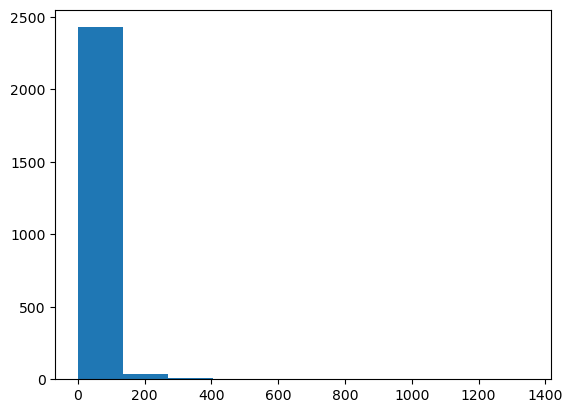

In [150]:
frequency = orders.loc[(orders['Country'] == 'Spain')]["amount_spent"]

plt.hist(frequency);

#### Select all orders made in the month of August.

In [151]:
orders.loc[(orders['month'] == 8)]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
199475,285421,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
199476,285422,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
199477,285423,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40
199478,285424,561905,84970L,2011,8,1,9,single heart zinc t-light holder,12,2011-08-01 09:31:00,0.95,14947,United Kingdom,11.40
199479,285425,561905,84970S,2011,8,1,9,hanging heart zinc t-light holder,12,2011-08-01 09:31:00,0.85,14947,United Kingdom,10.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226483,320688,565067,22644,2011,8,3,17,ceramic cherry cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90
226484,320689,565067,22645,2011,8,3,17,ceramic heart fairy cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90
226485,320690,565067,22637,2011,8,3,17,piggy bank retrospot,2,2011-08-31 17:16:00,2.55,15856,United Kingdom,5.10
226486,320691,565067,22646,2011,8,3,17,ceramic strawberry cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90


#### Find the number of orders made by each country in the month of August.
**Hint**: Use value_counts().

In [156]:
orders.loc[(orders['month'] == 8)].value_counts('Country')

Country
United Kingdom     23105
Germany              795
EIRE                 593
France               569
Netherlands          280
Switzerland          267
Spain                252
Belgium              194
Israel               171
Channel Islands      140
Australia            107
Italy                 95
Austria               88
Norway                77
Finland               61
Malta                 55
Portugal              41
Sweden                40
Unspecified           23
Iceland               22
Poland                17
Denmark               16
Canada                 5
dtype: int64

#### What's the  average amount of money spent by country?

In [161]:
pd.crosstab([orders['Country']], orders['Country'], values=orders['amount_spent'], aggfunc=np.mean, margins=True, margins_name='Total')['Total'][:-1]

Country
Australia               116.895620
Austria                  25.624824
Bahrain                  32.258824
Belgium                  20.283772
Brazil                   35.737500
Canada                   24.280662
Channel Islands          27.340160
Cyprus                   22.134169
Czech Republic           33.069600
Denmark                  49.882474
EIRE                     36.687745
European Community       21.670833
Finland                  32.913985
France                   25.056827
Germany                  25.311562
Greece                   32.831172
Iceland                  23.681319
Israel                   29.119718
Italy                    23.064960
Japan                   116.561900
Lebanon                  37.641778
Lithuania                47.458857
Malta                    24.335625
Netherlands             120.798282
Norway                   33.736418
Poland                   22.226212
Portugal                 22.872702
RSA                      17.281207
Saudi Arabia

#### What's the most expensive item?

In [162]:
orders["UnitPrice"].max()

8142.75

#### What is the average amount spent per year?

In [163]:
pd.crosstab([orders['year']], orders['year'], values=orders['amount_spent'], aggfunc=np.mean, margins=True, margins_name='Total')['Total'][:-1]

year
2010    21.892733
2011    22.430074
Name: Total, dtype: float64